In [1]:
import pandas as pd

In [2]:
real_df = pd.read_csv('trueNews.csv')
real_df.head()

,Date Posted,Link,Text,Region,Username,Publisher,Label
0,2/11/20,https://twitter.com/the_hindu/status/122725962...,Just in: Novel coronavirus named 'Covid-19': U...,India,the_hindu,The Hindu,1
1,2/12/20,https://twitter.com/ndtv/status/12274908434742...,WHO officially names #coronavirus as Covid-19....,India,ndtv,NDTV,1
2,2/12/20,https://twitter.com/the_hindu/status/122744471...,"The #UN #health agency announced that ""COVID-1...",India,the_hindu,The Hindu,1
3,2/14/20,https://twitter.com/IndiaToday/status/12282764...,The Indian Embassy in Tokyo has said that one ...,India,indiatoday,IndiaToday,1
4,2/15/20,https://twitter.com/the_hindu/status/122854247...,Ground Zero | How Kerala used its experience i...,India,the_hindu,The Hindu,1


In [3]:
fake_df = pd.read_csv('fakeNews.csv')
fake_df.head()

,Date Posted,Link,Text,Region,Country,Explanation,Origin,Origin_URL,Fact_checked_by,Poynter_Label,Binary Label
0,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,Tencent revealed the real number of deaths.\t\t,Europe,France,The screenshot is questionable.,Twitter,https://www.liberation.fr/checknews/2020/02/07...,CheckNews,Misleading,0
1,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,Taking chlorine dioxide helps fight coronavir...,Europe,Germany,Chlorine dioxide does guard against the coron...,Website,https://correctiv.org/faktencheck/medizin-und-...,Correctiv,FALSE,0
2,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,This video shows workmen uncovering a bat-inf...,India,India,A video shows bats nesting in the roof; howev...,Facebook,https://factcheck.afp.com/video-shows-workmen-...,AFP,MISLEADING,0
3,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,The Asterix comic books and The Simpsons pred...,India,India,Coronavirus has been around since the 1960s. ...,Twitter,https://www.boomlive.in/health/did-the-simpson...,BOOM FactCheck,Misleading,0
4,2/7/20,https://www.poynter.org/?ifcn_misinformation=c...,Chinese President Xi Jinping visited a mosque...,India,India,Chinese President Xi Jinping's visit to the m...,Facebook,http://newsmobile.in/articles/2020/02/07/chine...,NewsMobile,FALSE,0


In [4]:
#Create combined df using Real and Fake df
real_df = real_df.loc[:, ['Date Posted', 'Text', 'Label']]
fake_df = fake_df.loc[:, ['Date Posted', 'Text', 'Binary Label']]
fake_df = fake_df.rename(columns = {'Binary Label': 'Label'})

df = pd.concat([real_df, fake_df], ignore_index=True)
df

,Date Posted,Text,Label
0,2/11/20,Just in: Novel coronavirus named 'Covid-19': U...,1
1,2/12/20,WHO officially names #coronavirus as Covid-19....,1
2,2/12/20,"The #UN #health agency announced that ""COVID-1...",1
3,2/14/20,The Indian Embassy in Tokyo has said that one ...,1
4,2/15/20,Ground Zero | How Kerala used its experience i...,1
...,...,...,...
7583,6/23/20,Bill Gates said that the COVID-19 vaccine wil...,0
7584,6/23/20,COVID-19 vaccine candidates will insert micro...,0
7585,6/23/20,An image claims that chroma screen panels are...,0
7586,6/23/20,"Alexandria Ocasio-Cortez tweeted, ""It's vital...",0


In [8]:
df.to_csv("df.csv", index=False)

In [5]:
df["Text"].duplicated().sum()

332

In [6]:
df.drop_duplicates(subset=['Text'], inplace = True)

In [7]:
#Date data type encoding
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7256 entries, 0 to 7587
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date Posted  7256 non-null   datetime64[ns]
 1   Text         7256 non-null   object        
 2   Label        7256 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 226.8+ KB


In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

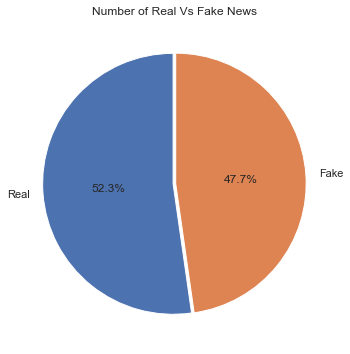

In [99]:
pie, ax = plt.subplots(figsize=[20, 6])
plt.pie(x= data, autopct="%.1f%%", explode=[0.01]*2, labels=["Real", "Fake"], pctdistance=0.5, startangle=90)
plt.title("Number of Real Vs Fake News")
plt.show()

In [10]:
# Total Number of Tweets over time

date_df = pd.DataFrame(df.groupby('Date Posted')['Text'].nunique())
date_df.rename(columns = {'Text': 'Date Count'}, inplace=True)
date_df

,Date Count
Date Posted,
2020-02-07,6
2020-02-08,6
2020-02-09,1
2020-02-10,12
2020-02-11,8
...,...
2020-06-26,32
2020-06-27,31
2020-06-28,21


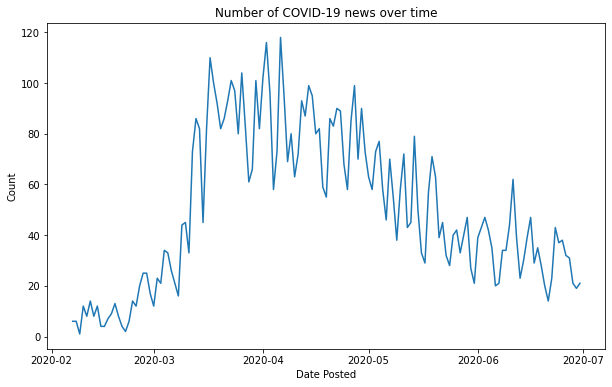

In [11]:
plt.figure(figsize=(10,6))

sns.lineplot(data=date_df, x='Date Posted', y='Date Count')

plt.title("Number of COVID-19 news over time")
plt.ylabel("Count")
plt.show()

In [12]:
fake_tweets = df[df['Label'] == 0]
real_tweets = df[df['Label'] == 1]

In [13]:
fake_tweets_date = pd.DataFrame(fake_tweets.groupby('Date Posted')['Text'].nunique())
fake_tweets_date.rename(columns = {'Text': 'Date Count'}, inplace=True)
fake_tweets_date

,Date Count
Date Posted,
2020-02-07,6
2020-02-08,6
2020-02-09,1
2020-02-10,12
2020-02-11,7
...,...
2020-06-19,3
2020-06-20,1
2020-06-22,2


In [14]:
real_tweets_date = pd.DataFrame(real_tweets.groupby('Date Posted')['Text'].nunique())
real_tweets_date.rename(columns = {'Text': 'Date Count'}, inplace=True)
real_tweets_date

,Date Count
Date Posted,
2020-02-11,1
2020-02-12,2
2020-02-14,1
2020-02-15,2
2020-02-16,2
...,...
2020-06-26,32
2020-06-27,31
2020-06-28,21


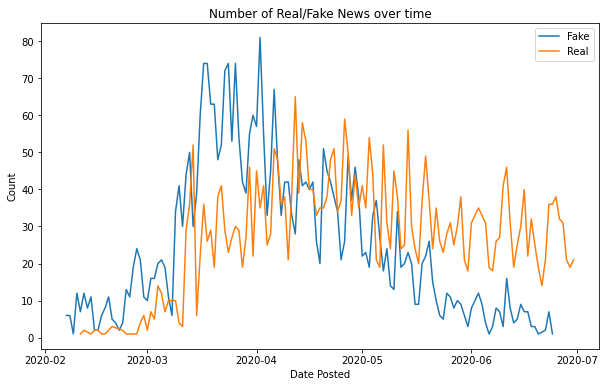

In [15]:
plt.figure(figsize=(10,6))

sns.lineplot(data=fake_tweets_date, x='Date Posted', y='Date Count')
sns.lineplot(data=real_tweets_date, x='Date Posted', y='Date Count')

plt.title("Number of Real/Fake News over time")
plt.ylabel("Count")
plt.legend(labels=['Fake', 'Real'])
plt.show()

In [16]:
df['Length'] = df['Text'].apply(lambda x: len(x.split(' ')))
df.head()

,Date Posted,Text,Label,Length
0,2020-02-11,Just in: Novel coronavirus named 'Covid-19': U...,1,10
1,2020-02-12,WHO officially names #coronavirus as Covid-19....,1,8
2,2020-02-12,"The #UN #health agency announced that ""COVID-1...",1,19
3,2020-02-14,The Indian Embassy in Tokyo has said that one ...,1,22
4,2020-02-15,Ground Zero | How Kerala used its experience i...,1,26


In [17]:
fake_tweets = df[df['Label'] == 0]
real_tweets = df[df['Label'] == 1]

In [18]:
tweets_len_mean = df.groupby('Label').mean()
tweets_len_mean

,Length
Label,
0,17.647229
1,21.488133


C:\Users\Samson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Samson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


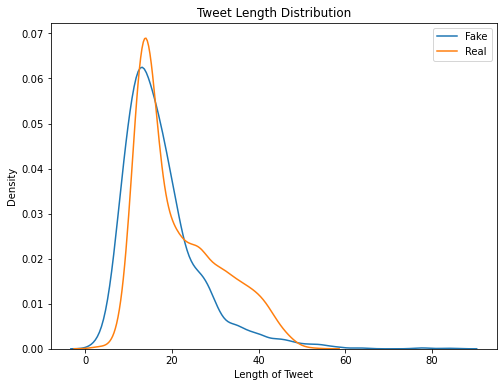

In [19]:
plt.figure(figsize=(8,6))

sns.distplot(x= fake_tweets["Length"], hist= False)
sns.distplot(x= real_tweets["Length"], hist= False)
    
plt.title("Tweet Length Distribution")
plt.xlabel("Length of Tweet")
plt.legend(labels=['Fake', 'Real'])
plt.show()

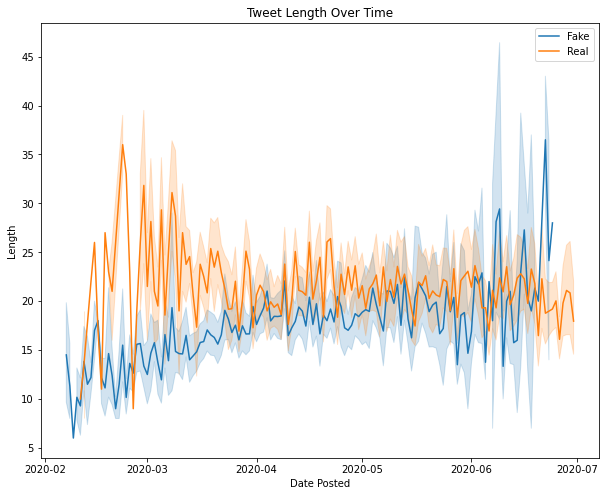

In [20]:
plt.figure(figsize=(10,8))

sns.lineplot(data=fake_tweets, x='Date Posted', y='Length')
sns.lineplot(data=real_tweets, x='Date Posted', y='Length')

plt.title("Tweet Length Over Time")
plt.legend(labels=['Fake', 'Real'])
plt.show()

In [21]:
from textblob import TextBlob

In [22]:
### LABEL SUBJECTIVITY AND POLARITY TO EACH TEXT

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)
df['Analysis'] = df['Polarity'].apply(getAnalysis)


# polarity range -1 to 1
# polarity refers to the attitude or the emotion of the writer
# close to 1 means positive statement and -1 negative statement

# subjectivity range 0 to 1
# close to 1 refers that mostly it is a public opinion and not factua

In [23]:
df

,Date Posted,Text,Label,Length,Subjectivity,Polarity,Analysis
0,2020-02-11,Just in: Novel coronavirus named 'Covid-19': U...,1,10,0.000000,0.000000,neutral
1,2020-02-12,WHO officially names #coronavirus as Covid-19....,1,8,0.000000,0.000000,neutral
2,2020-02-12,"The #UN #health agency announced that ""COVID-1...",1,19,0.400000,-0.200000,negative
3,2020-02-14,The Indian Embassy in Tokyo has said that one ...,1,22,0.522727,0.363636,positive
4,2020-02-15,Ground Zero | How Kerala used its experience i...,1,26,1.000000,0.000000,neutral
...,...,...,...,...,...,...,...
7583,2020-06-23,Bill Gates said that the COVID-19 vaccine wil...,0,13,0.000000,0.000000,neutral
7584,2020-06-23,COVID-19 vaccine candidates will insert micro...,0,9,0.000000,0.000000,neutral
7585,2020-06-23,An image claims that chroma screen panels are...,0,16,0.000000,0.000000,neutral
7586,2020-06-23,"Alexandria Ocasio-Cortez tweeted, ""It's vital...",0,45,0.380000,0.050000,positive


In [55]:
df1 = df.sort_values(by=['Polarity'])
df1[["Text", "Polarity", "Subjectivity", "Analysis"]]

,Text,Polarity,Subjectivity,Analysis
3006,thursdays metro 50000 covid death toll in the ...,-1.0,1.0,negative
1842,uk on track to become one of europes worst hit...,-1.0,1.0,negative
7420,the video of terrible conditions of a covid-1...,-1.0,1.0,negative
2976,care home records 24 deaths in one of worst co...,-1.0,1.0,negative
1099,the patience of the 75 crore people of the sta...,-1.0,1.0,negative
...,...,...,...,...
3974,beef meat is the best vaccine against covid-19,1.0,0.3,positive
955,whos tedros sends best wishes to johnson suffe...,1.0,0.3,positive
898,greatest emergency since independence raghuram...,1.0,1.0,positive
1821,perspective if you get covid19 leaving your ho...,1.0,0.3,positive


In [25]:
df2 = df.sort_values(by=['Subjectivity'])
df2

,Date Posted,Text,Label,Length,Subjectivity,Polarity,Analysis
0,2020-02-11,Just in: Novel coronavirus named 'Covid-19': U...,1,10,0.0,0.00,neutral
4622,2020-03-18,If we want to protect ourselves from the coro...,0,23,0.0,0.00,neutral
4621,2020-03-18,5G Technology Believed To Have Caused coronav...,0,8,0.0,0.00,neutral
1990,2020-05-02,Liquor shops will not be allowed in Covid-19 c...,1,11,0.0,0.00,neutral
4616,2020-03-18,Evidence shows the WHO director-general overs...,0,10,0.0,0.00,neutral
...,...,...,...,...,...,...,...
7420,2020-06-01,The video of terrible conditions of a COVID-1...,0,14,1.0,-1.00,negative
204,2020-03-14,No confirmed case of Covid-19 has been found s...,1,16,1.0,-0.05,negative
3199,2020-06-10,Australia's coronavirus lockdown rules and Cov...,1,21,1.0,0.10,positive
4533,2020-03-17,"In the United States, WIC receivers still onl...",0,17,1.0,0.00,neutral


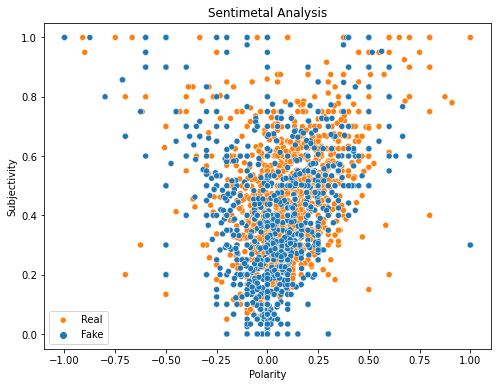

In [26]:
plt.figure(figsize=(8,6))

sns.scatterplot(x ="Polarity", y = "Subjectivity", hue = "Label", data = df)

plt.title('Sentimetal Analysis')
plt.legend(labels=['Real', 'Fake'])
plt.show()

In [27]:
fake_tweets = df[df['Label'] == 0]
real_tweets = df[df['Label'] == 1]

C:\Users\Samson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Samson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


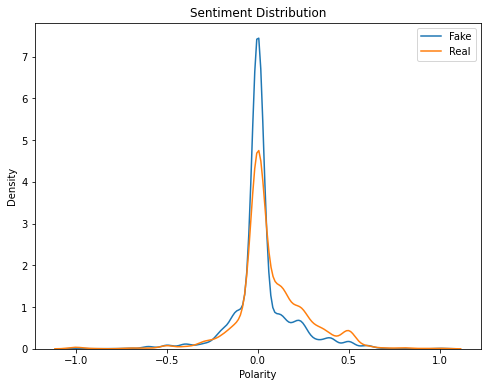

In [28]:
plt.figure(figsize=(8,6))

sns.distplot(x= fake_tweets["Polarity"], hist= False)
sns.distplot(x= real_tweets["Polarity"], hist= False)

plt.xlabel("Polarity")
plt.title("Sentiment Distribution")
plt.legend(labels=['Fake', 'Real'])
plt.show()

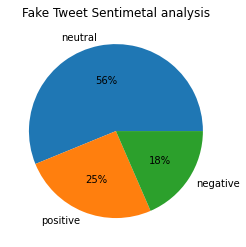

In [29]:
fake_tweets['Analysis'].value_counts().plot(kind='pie',autopct="%.0f%%")

plt.title('Fake Tweet Sentimetal analysis')
plt.ylabel('')
plt.show()

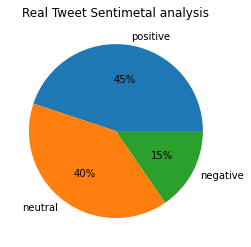

In [30]:
real_tweets['Analysis'].value_counts().plot(kind='pie',autopct="%.0f%%")

plt.title('Real Tweet Sentimetal analysis')
plt.ylabel('')
plt.show()

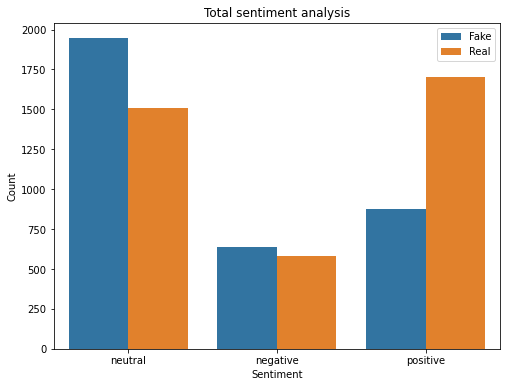

In [31]:
plt.figure(figsize=(8,6))

sns.countplot(x="Analysis", hue="Label", data=df)

plt.title('Total sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(labels=['Fake', 'Real'])
plt.show()

In [32]:
from empath import Empath
lexicon = Empath()

def empathy(text):
    analysis = lexicon.analyze(text, normalize=True)
    return analysis

In [33]:
df['Empathy'] = df['Text'].apply(empathy)
df.head()

,Date Posted,Text,Label,Length,Subjectivity,Polarity,Analysis,Empathy
0,2020-02-11,Just in: Novel coronavirus named 'Covid-19': U...,1,10,0.000000,0.000000,neutral,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
1,2020-02-12,WHO officially names #coronavirus as Covid-19....,1,8,0.000000,0.000000,neutral,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
2,2020-02-12,"The #UN #health agency announced that ""COVID-1...",1,19,0.400000,-0.200000,negative,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
3,2020-02-14,The Indian Embassy in Tokyo has said that one ...,1,22,0.522727,0.363636,positive,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
4,2020-02-15,Ground Zero | How Kerala used its experience i...,1,26,1.000000,0.000000,neutral,"{'help': 0.038461538461538464, 'office': 0.0, ..."


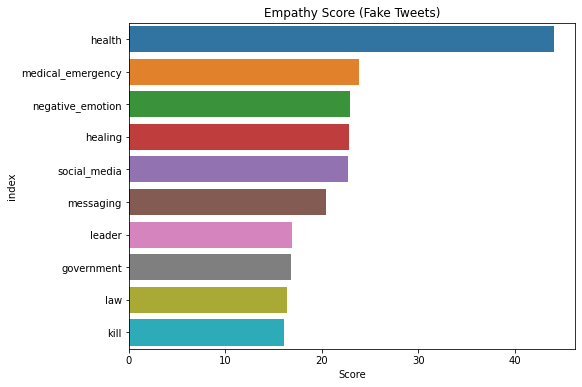

In [34]:
fake_empath = {}

for x in df[df["Label"] == 0 ]['Empathy']:
    for key, value in x.items():
        if key in fake_empath:
            fake_empath[key] += value
        else:
            fake_empath[key] = value

result = pd.DataFrame.from_dict(fake_empath, orient='index', columns=['Score'])
result = result.sort_values(by = 'Score', ascending=False)[:10].reset_index()

plt.figure(figsize=(8,6))
sns.barplot(y = "index", x ="Score", data= result)

plt.title("Empathy Score (Fake Tweets)")
plt.show()

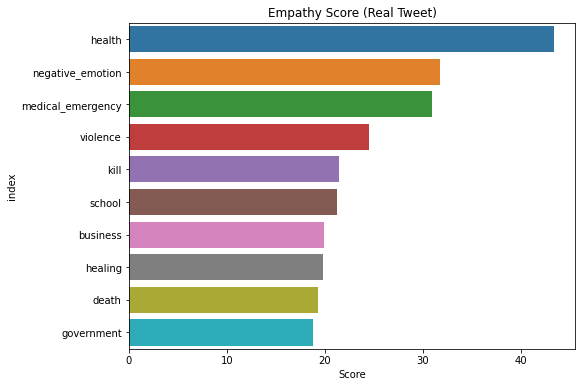

In [35]:
real_empath = {}

for x in df[df["Label"] == 1 ]['Empathy']:
    for key, value in x.items():
        if key in real_empath:
            real_empath[key] += value
        else:
            real_empath[key] = value

result = pd.DataFrame.from_dict(real_empath, orient='index', columns=['Score'])
result = result.sort_values(by = 'Score', ascending=False)[:10].reset_index()

plt.figure(figsize=(8,6))
sns.barplot(y = "index", x ="Score", data= result)

plt.title("Empathy Score (Real Tweet)")
plt.show()

In [36]:
import re

In [59]:
#Data Cleaning & Text preprocessing 
texts_list = []
for index, row in df.iterrows():
    x = df["Text"][index]
    #remove https
    x = "".join(re.sub('https:\/\/.*', "", x))
    #remove http
    x = "".join(re.sub('http:\/\/.*', "", x))
    #remove twitter pic
    x = "".join(re.split('pic.twitter.com/.*', x))
    #remove usernames starting with @
    x = "".join(re.split('@.*', x))
    #remove special characters except #
    x = re.sub("[:;',.()|?+_\"!?#]", "", x)
    x = re.sub("covid-19", "covid19", x)
    #remove newline
    x = re.sub("\n", " ", x)
    #replace multi spaces with 1 space
    x = re.sub('\s+'," ", x)
    #to lowercase
    x = x.lower()
    texts_list.append(x)

df['Text'] = texts_list

In [38]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [60]:
df['Clean'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

,Date Posted,Text,Label,Length,Subjectivity,Polarity,Analysis,Empathy,Clean
0,2020-02-11,just in novel coronavirus named covid19 un hea...,1,10,0.000000,0.000000,neutral,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",novel coronavirus named covid19 un health agen...
1,2020-02-12,who officially names coronavirus as covid19 co...,1,8,0.000000,0.000000,neutral,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",officially names coronavirus covid19 coronavir...
2,2020-02-12,the un health agency announced that covid19 wi...,1,19,0.400000,-0.200000,negative,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",un health agency announced covid19 official na...
3,2020-02-14,the indian embassy in tokyo has said that one ...,1,22,0.522727,0.363636,positive,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",indian embassy tokyo said one indian crew memb...
4,2020-02-15,ground zero how kerala used its experience in ...,1,26,1.000000,0.000000,neutral,"{'help': 0.038461538461538464, 'office': 0.0, ...",ground zero kerala used experience controlling...
...,...,...,...,...,...,...,...,...,...
7583,2020-06-23,bill gates said that the covid19 vaccine will...,0,13,0.000000,0.000000,neutral,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",bill gates said covid19 vaccine permanently ch...
7584,2020-06-23,covid19 vaccine candidates will insert microc...,0,9,0.000000,0.000000,neutral,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",covid19 vaccine candidates insert microchips h...
7585,2020-06-23,an image claims that chroma screen panels are...,0,16,0.000000,0.000000,neutral,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",image claims chroma screen panels used make co...
7586,2020-06-23,alexandria ocasio-cortez tweeted its vital th...,0,45,0.380000,0.050000,positive,"{'help': 0.022727272727272728, 'office': 0.0, ...",alexandria ocasio-cortez tweeted vital governo...


In [40]:
from wordcloud import WordCloud

In [63]:
fake_tweets = df[df['Label'] == 0]
real_tweets = df[df['Label'] == 1]

In [42]:
def create_wordcloud(text_series, title):
    
    new_stopword = ["covid19", "coronavirus", "covid","india"]
    wc = WordCloud(background_color = 'white', stopwords= new_stopword, height = 200, width = 400)    
    words = ' '.join(w for w in text_series)
    wc.generate(words)

    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize= 20)
    plt.axis('off')
    plt.show()

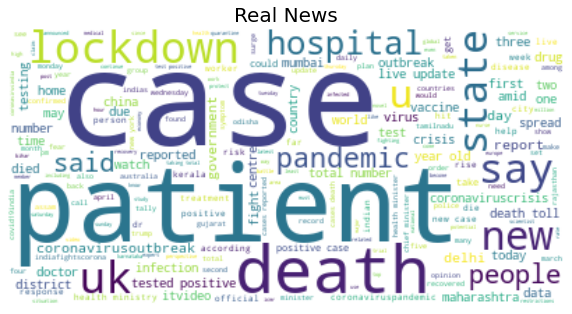

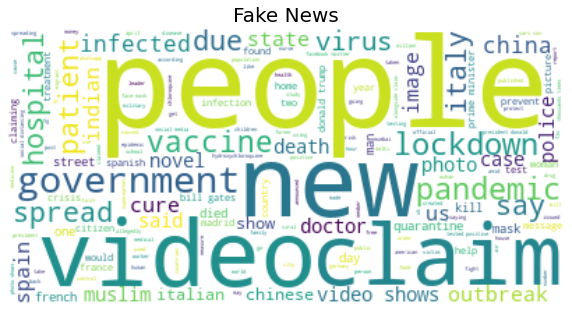

In [43]:
create_wordcloud(real_tweets['Clean'], 'Real News')
create_wordcloud(fake_tweets['Clean'], 'Fake News')

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
#Function to get top bigram words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [71]:
#Calling function and return only top 20 words
common_words = get_top_n_bigram(real_tweets['Clean'], 10)
#Creating the dataframe of word and frequency
bigram_real = pd.DataFrame(common_words, columns = ['Bigram (Real)' ,'Count'])
bigram_real

,Bigram (Real),Count
0,covid19 cases,335
1,positive covid19,138
2,covid19 pandemic,127
3,covid19 patients,118
4,death toll,117
5,tested positive,111
6,covid19 lockdown,94
7,covid19 death,88
8,new covid19,83
9,coronavirus covid19,79


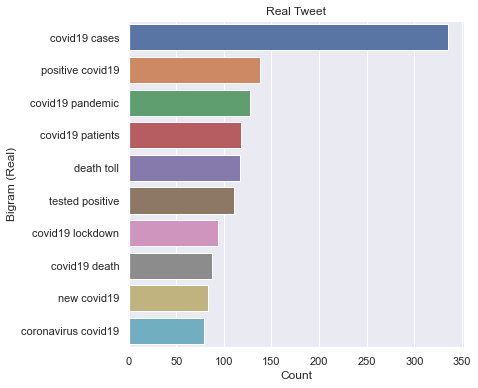

In [75]:
plt.figure(figsize=(6,6))

sns.barplot(x="Count", y="Bigram (Real)", data= bigram_real)
plt.title("Real Tweet")
plt.show()

In [76]:
#Calling function and return only top 20 words
common_words = get_top_n_bigram(fake_tweets['Clean'], 10)
#Creating the dataframe of word and frequency
bigram_fake = pd.DataFrame(common_words, columns = ['Bigram (Fake)' ,'Count'])
bigram_fake

,Bigram (Fake),Count
0,new coronavirus,103
1,novel coronavirus,91
2,video shows,84
3,coronavirus pandemic,60
4,bill gates,59
5,due coronavirus,52
6,donald trump,50
7,spread coronavirus,50
8,prime minister,48
9,covid19 pandemic,46


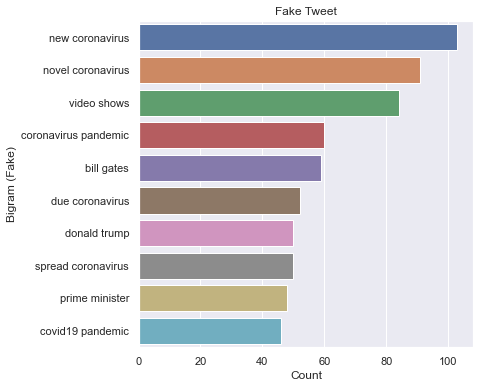

In [77]:
plt.figure(figsize=(6,6))

sns.barplot(x="Count", y="Bigram (Fake)", data= bigram_fake)
plt.title("Fake Tweet")
plt.show()

In [79]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [80]:
#Calling function and return only top 20 words
common_words = get_top_n_trigram(fake_tweets['Clean'], 10)
#Creating the dataframe of word and frequency
trigram_fake = pd.DataFrame(common_words, columns = ['Trigram (Fake)' ,'Count'])
trigram_fake

,Trigram (Fake),Count
0,president donald trump,39
1,tested positive coronavirus,20
2,alongside claim shows,20
3,indian prime minister,14
4,facebook twitter alongside,14
5,twitter alongside claim,13
6,multiple posts facebook,13
7,posts facebook twitter,13
8,every 15 minutes,12
9,water every 15,12


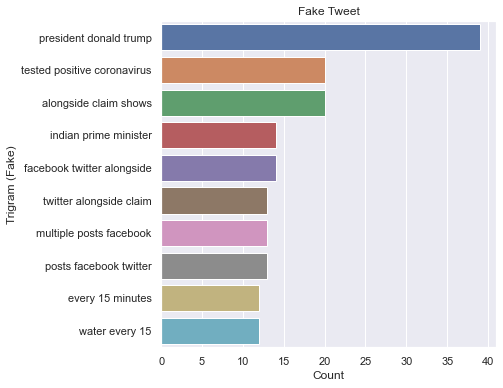

In [81]:
plt.figure(figsize=(6,6))

sns.barplot(x="Count", y="Trigram (Fake)", data= trigram_fake)
plt.title("Fake Tweet")
plt.show()

In [82]:
#Calling function and return only top 20 words
common_words = get_top_n_trigram(real_tweets['Clean'], 10)
#Creating the dataframe of word and frequency
trigram_real = pd.DataFrame(common_words, columns = ['Trigram (Real)' ,'Count'])
trigram_real

,Trigram (Real),Count
0,tested positive covid19,80
1,covid19 death toll,58
2,new covid19 cases,56
3,covid19 positive cases,43
4,confirmed covid19 cases,34
5,number covid19 cases,31
6,test positive covid19,27
7,covid19 cases reported,25
8,coronavirus live updates,23
9,uk covid19 death,22


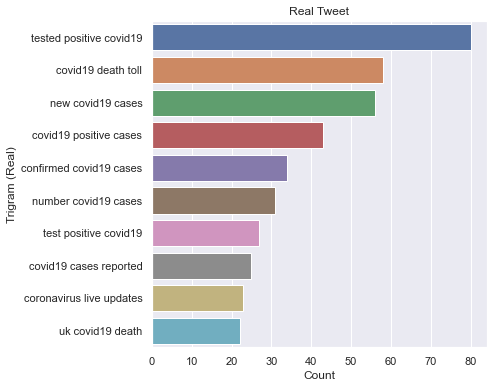

In [83]:
plt.figure(figsize=(6,6))

sns.barplot(x="Count", y="Trigram (Real)", data= trigram_real)
plt.title("Real Tweet")
plt.show()

In [52]:
import gensim

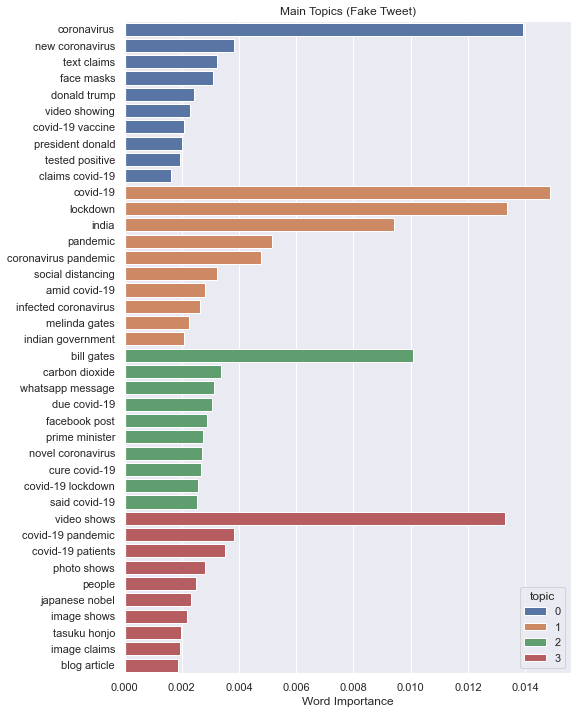

In [53]:
#Topic Modeling for Fake Tweets

#Fake Tweets Topic Modelling
corpus = fake_tweets['Clean']

## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)
## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)
## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 
## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=4, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,4):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
        
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])
    
## plot
sns.set(rc={'figure.figsize':(8,15)})
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics (Fake Tweet)')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

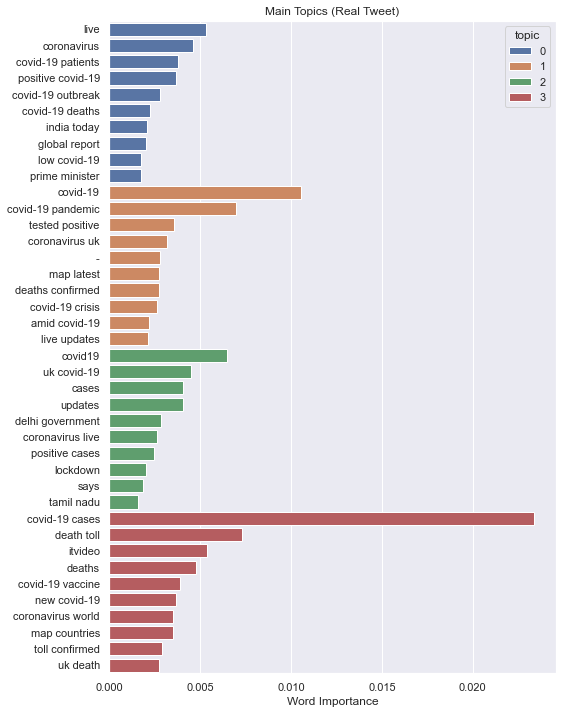

In [54]:
#Topic Modeling for Real Tweets

#Real Tweets Topic Modelling
corpus = real_tweets['Clean']

## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)
## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)
## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 
## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=4, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,4):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
        
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])
    
## plot
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(8,12)})
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics (Real Tweet)')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()